# Pandas 시각화
판다스 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.    
matplotlib을 이용해 그래프에 대한 설정을 추가로 할 수 있다.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

## plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- **kind** : 그래프 종류 지정
    - **'line'**: line plot (default)
    - **'bar'**: vertical bar plot
    - **'barh'**: horizontal bar plot
    - **'hist'**: histogram
    - **'box'**: boxplot
    - **'kde'**: Kernel Density Estimation plot
    - **'pie'**: pie plot
    - **'scatter'**: scatter plot

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다. ==> 라벨로 사용

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

tips = pd.read_csv('data/tips.csv')
tips.shape

(244, 7)

<Axes: xlabel='day'>

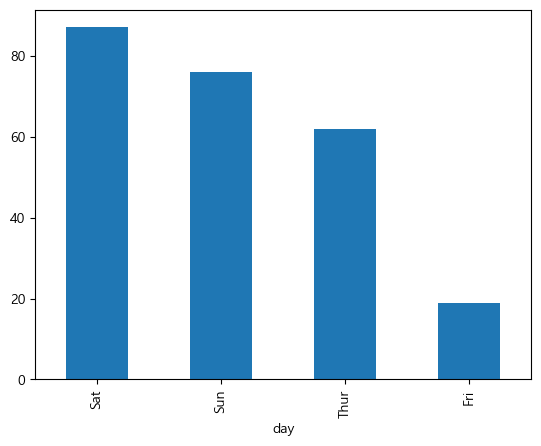

In [7]:
tips['day'].value_counts().plot(kind="bar")

<Axes: xlabel='day'>

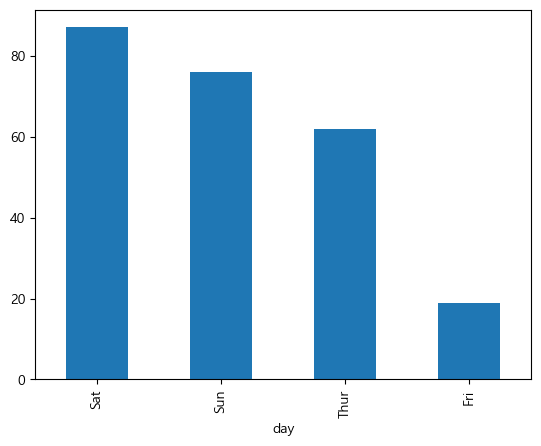

In [10]:
tips['day'].value_counts().plot.bar()

In [11]:
tips['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

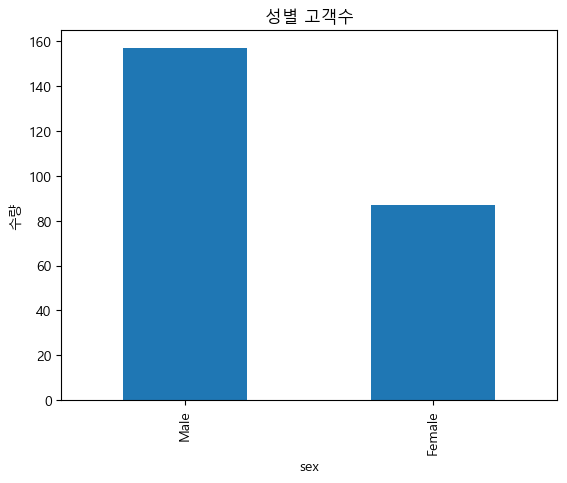

In [12]:
# 성별 고객수
v = tips['sex'].value_counts()

## Series값으로 그래프를 그릴 때 index name을 한축(x), 값을 다른 한축(y)에 놓는다.
v.plot(kind='bar') 

# pandas는 내부적으로 matplotlib 사용해서 그래프를 그린다.
# 그래서 추가 설정은 plot()의 파라미터로 전달  또는 matplotlib의 함수 사용할 수있다.
plt.title("성별 고객수")
plt.ylabel("수량")
plt.show()

In [13]:
v.plot?

Signature:      v.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x0000020A9B97BEF0>
File:           c:\users\playdata\miniconda3\envs\ml\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' :

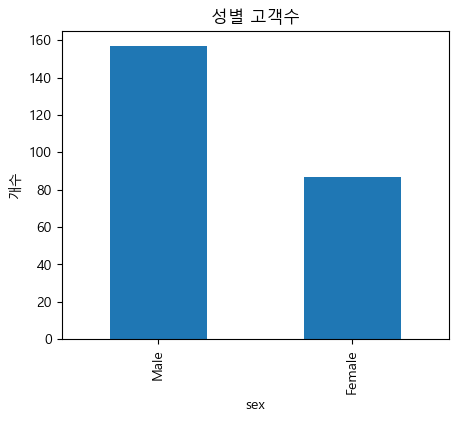

In [14]:
v.plot(kind='bar', title="성별 고객수", ylabel='개수', figsize=(5, 4))
plt.show()

In [15]:
tips.groupby(["sex", "smoker"])['total_bill'].count()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: total_bill, dtype: int64

In [16]:
# 성별-흡연여부별 손님 수
result = tips.pivot_table(index="sex", columns="smoker", values="total_bill", aggfunc="count")
result

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


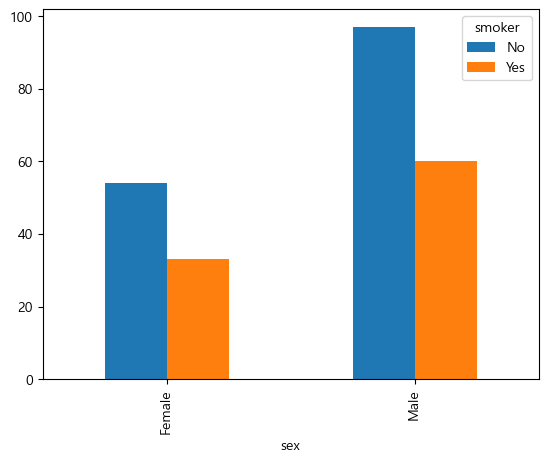

In [17]:
# 하나의 값으로(series) 그래프를 그리는 함수.
## DataFrame.plot() => 컬럼별로 그린다.
result.plot(kind='bar')
plt.show()

In [18]:
result

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


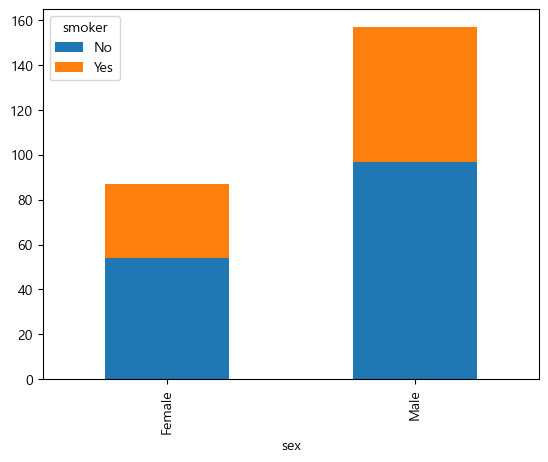

In [19]:
result.plot(
    kind='bar', 
    stacked=True #  막대: 전체 개수, smoker 별 비율로 나눠줌.
)
plt.show()

In [20]:
result = tips.pivot_table(index="smoker", columns='day', values='total_bill', aggfunc="sum")
result

day,Fri,Sat,Sun,Thur
smoker,,,,
No,73.68,884.78,1168.88,770.09
Yes,252.20,893.62,458.28,326.24


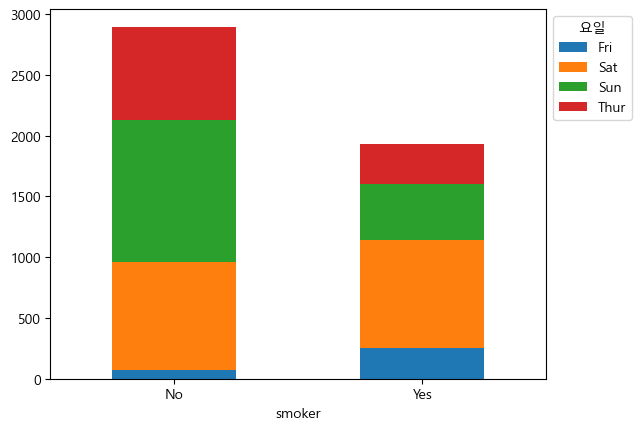

In [32]:
# result.plot(kind='bar')
result.plot(kind='bar', stacked=True, rot=0)
plt.legend(bbox_to_anchor=(1,1), loc="upper left", title="요일")#, ncols=2)
plt.show()

In [33]:
tips['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

## 파이차트

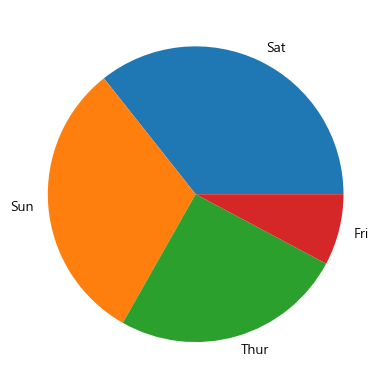

In [37]:
r = tips['day'].value_counts()
plt.pie(r, labels=r.index);

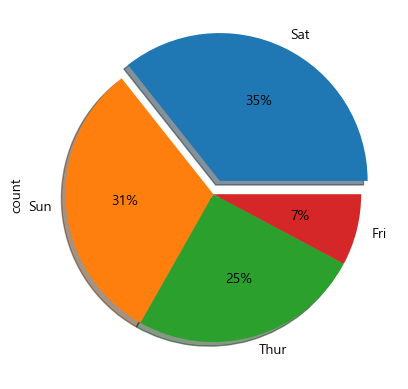

In [38]:
tips['day'].value_counts().plot(
    kind='pie',   # 값 - label: index이름
    autopct="%d%%",
    explode=[0.1, 0, 0, 0], shadow=True
)
plt.show()

## 히스토그램, KDE(커널밀도추정그래프)

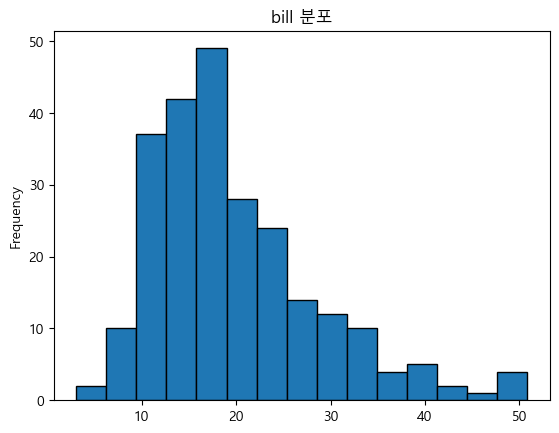

In [40]:
tips['total_bill'].plot(
    kind="hist", 
    bins=15, 
    edgecolor="k",
    title="bill 분포"
)
plt.show()

In [42]:
!pip install scipy

   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---- ----------------------------------- 4.5/44.5 MB 24.4 MB/s eta 0:00:02
   --------------- ------------------------ 17.0/44.5 MB 42.9 MB/s eta 0:00:01
   ------------------------- -------------- 28.8/44.5 MB 46.9 MB/s eta 0:00:01
   ---------------------------------------  44.3/44.5 MB 55.3 MB/s eta 0:00:01
   ---------------------------------------- 44.5/44.5 MB 51.5 MB/s eta 0:00:00


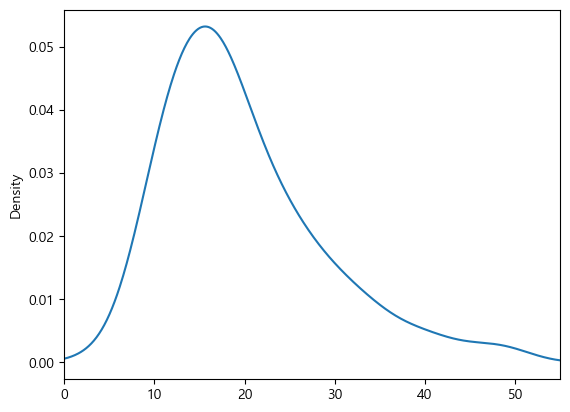

In [45]:
tips['total_bill'].plot(kind="kde") 
plt.xlim(0, 55)
plt.show()

In [46]:
tips[['tip', 'total_bill']]

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59
...,...,...
239,5.92,29.03
240,2.00,27.18
241,2.00,22.67
242,1.75,17.82


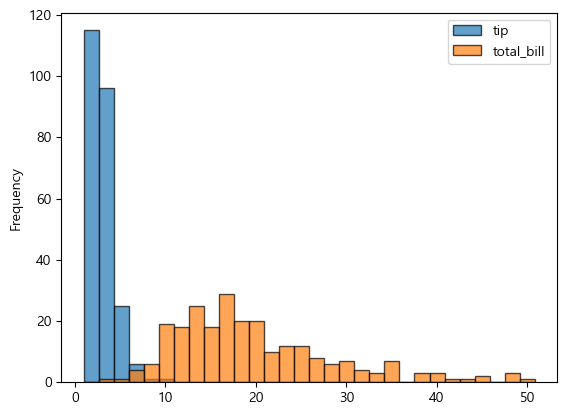

In [48]:
tips[['tip', 'total_bill']].plot(kind='hist', alpha=0.7, bins=30, edgecolor="k")
plt.show()

## Boxplot (상자그래프)

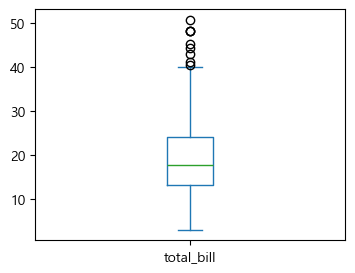

In [49]:
tips['total_bill'].plot(kind="box", figsize=(4, 3))
plt.show()

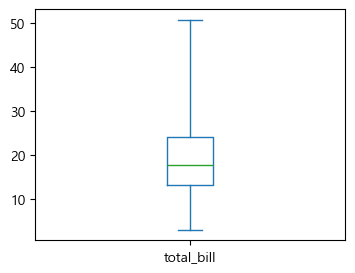

In [52]:
tips['total_bill'].plot(kind="box", whis=0.5, figsize=(4, 3))
plt.show()

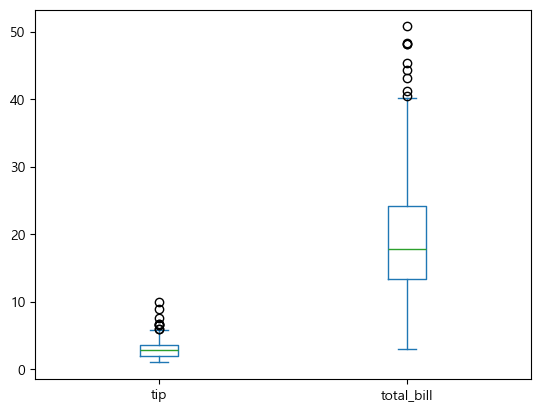

In [54]:
tips[['tip', 'total_bill']].plot(kind="box")
plt.show()

## scatter plot (산점도) 

In [ ]:
tips.plot(kind="scatter", x="tip", y="total_bill", alpha=0.2)
plt.show()

In [ ]:
tips[['tip', 'total_bill']].corr()

In [ ]:
dia = pd.read_csv("data/diamonds.csv")
v = dia.select_dtypes(include="number").corr()
v

In [ ]:
plt.imshow(v)#, cmap="Blues")
plt.colorbar()
plt.show()

In [ ]:
# plt.imshow() : 원래 기능 - 이미지출력
from PIL import Image
import numpy as np
img = np.array(Image.open("image.jpg"))
plt.imshow(img)
plt.show()

# line plot

In [ ]:
df = pd.read_excel("data/강수량.xlsx", index_col="계절").T
df

In [ ]:
df['봄'].plot(figsize=(15, 4), marker="o")
plt.show()

In [ ]:
df.plot(figsize=(15,4))
plt.show()

In [ ]:
df.T

In [ ]:
df.T.plot()
plt.legend(bbox_to_anchor=(1,1), loc="upper left", title="년도", ncols=2) # 2개 열로 나눠서.
plt.show()